In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
import datetime
from numpy import linalg as LA # Функция linalg.lstsq() решает задачу поиска
                               # наименьших квадратов для линейного матричного уравнения.
#from tqdm import tqdm
#from sklearn.metrics import confusion_matrix

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'  #графики в svg выглядят более четкими

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4

# def save(name='', fmt='png'):
#     pwd = os.getcwd()    
#     iPath = 'C:/Users/Татьяна/Desktop/курсач/graph/{}'.format(fmt)
#     if not os.path.exists(iPath):
#         os.mkdir(iPath)
#     os.chdir(iPath)
#     plt.savefig('{}.{}'.format(name, fmt), fmt='png')
#     os.chdir(pwd)
#     #plt.close()

# ------------------------------- НАИБОЛЬШИЙ ОБЩИЙ ДЕЛИТЕЛЬ: |ax+by|

## 1) При больших R


In [518]:
data = pd.read_csv('C:/Users/Татьяна/source/repos/course_2019/course_2019/gcd64_big5_R.txt', header = None, sep = '\t', engine='python', delimiter=';')
print(data.shape)

data.columns = ['counter', 'a', 'b', 'first.first', 'first.second', 'second.first', 'second.second', 'first_min', 'second_min', 'count_oracle']

data['abs.first.first'] = data['first.first'].abs()
data['abs.first.second'] = data['first.second'].abs()
data['abs.second.first'] = data['second.first'].abs()
data['abs.second.second'] = data['second.second'].abs()
data['R'] = data[['abs.first.first','abs.first.second','abs.second.first','abs.second.second']].max(axis=1)
data['log2(R)'] = np.log2(data['R'])

(100000, 10)


In [523]:
data_big_R = data[data['R'] > 1000000000000000000] #10^18
data_big_R['A'] = data_big_R['count_oracle']/(np.log2(data_big_R['R']))

# for GCD
data_big_R['A'].describe()

count    90302.000000
mean         2.925536
std          0.197994
min          2.187337
25%          2.787486
50%          2.920024
75%          3.054795
max          3.921446
Name: A, dtype: float64

In [520]:
dataStr = data_big_R[0:100000]

### Графики

In [26]:
# Гистограмма
#dataStr[['A','count_oracle','R','a','b','log2(R)']].hist(figsize=(20,16), bins=20);

In [27]:
# Матрица корреляции

# corr_matrix = data_big_R.drop(['counter','abs.first.first', 'abs.first.second', 'abs.second.first','abs.second.second'], axis=1).corr()
# sns.heatmap(corr_matrix);

#sns.heatmap(dataStr.corr(),cmap='coolwarm',annot=True);

In [71]:
# совместное распределение по двум переменным + гистограмма

sns.set(style="ticks", palette="muted")

# график рассеивания с маргинальными гистограммами
#sns_plot = sns.jointplot(x=dataStr['A'], y=dataStr['count_oracle'], linewidth=1, kind='scatter', ratio=5, alpha = 0.75);

#Добавлена регрессию и подгонку плотности ядра:
#sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='reg', scatter_kws={"s": 8}, ci=None);

# график рассеивания с наложением
# hexplot = sns.jointplot(x=dataStr['A'], y=dataStr['count_oracle'], kind='hex');
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# # make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# plt.colorbar(cax=cbar_ax)
# plt.show()

#hexplot=sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='hex');
#плотность
#sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='kde', space = 0);

# график рассеивания + оценка плотности соединения
#sns.jointplot(dataStr['R'], dataStr['count_oracle'], sizes = (10,10)).plot_joint(sns.kdeplot, zorder=10, n_levels=10)

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# # make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# plt.colorbar(cax=cbar_ax)
# plt.show()
# #sns_plot.savefig('pairplot.png') #sns_plot = 

## 2) МНК

In [2]:
data = pd.read_csv('C:/Users/Татьяна/source/repos/course_2019/course_2019/gcd64.txt', header = None, sep = '\t', engine='python', delimiter=';')
print(data.shape)

data.columns = ['counter', 'a', 'b', 'first.first', 'first.second', 'second.first', 'second.second', 'first_min', 'second_min', 'count_oracle']

data['abs.first.first'] = data['first.first'].abs()
data['abs.first.second'] = data['first.second'].abs()
data['abs.second.first'] = data['second.first'].abs()
data['abs.second.second'] = data['second.second'].abs()
data['R'] = data[['abs.first.first','abs.first.second','abs.second.first','abs.second.second']].max(axis=1)
data['log2(R)'] = np.log2(data['R'])

(100000, 10)


In [4]:
dataStr = data

In [11]:
# МНК for GCD
x = dataStr['log2(R)']
y = dataStr['count_oracle']

M = np.vstack([x, np.ones(len(x))]).T
A, B = np.linalg.lstsq(M, y, rcond=None)[0]
A, B

(2.75797475634349, 9.73837895300585)

### Графики

In [5]:
#Гистограмма
#dataStr[['count_oracle','R','a','b']].hist(figsize=(16,12), bins=20);
#dataStr[['R','log2(R)']].hist(figsize=(10,6), bins=50);

In [12]:
# Матрица корреляции

#corr_matrix = data_big_R.drop(['counter','abs.first.first', 'abs.first.second', 'abs.second.first','abs.second.second'], axis=1).corr()
#sns.heatmap(corr_matrix);

#sns.heatmap(dataStr.corr(),cmap='coolwarm',annot=True);

In [499]:
# совместное распределение по двум переменным + гистограмма

#sns.set(style="ticks", palette="muted")

# график рассеивания с маргинальными гистограммами
#sns_plot = sns.jointplot(x=dataStr['A'], y=dataStr['count_oracle'], linewidth=1, kind='scatter', ratio=5, alpha = 0.75);

#Добавлена регрессию и подгонку плотности ядра:
#sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='reg', scatter_kws={"s": 8}, ci=None);

# график рассеивания с наложением
#sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='hex');

#плотность
#hexplot = sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='kde', space = 0);

#hexplot = sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='hex');
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# plt.colorbar(cax=cbar_ax)
# plt.show()

# график рассеивания + оценка плотности соединения
#sns.jointplot(dataStr['R'], dataStr['count_oracle'], sizes = (10,10)).plot_joint(sns.kdeplot, zorder=10, n_levels=10)

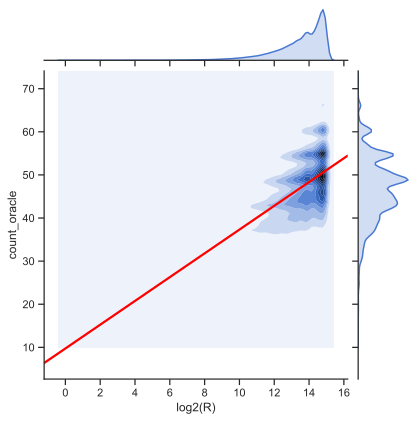

In [7]:
# Рассеивание + прямая
sns.set(style="ticks", palette="muted")
hexplot = sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='kde');
sns.regplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], scatter = False, color = 'red',ax=hexplot.ax_joint);

# -------- КВАДРАТИЧНО ПОЛОЖИТЕЛЬНАЯ ФУНКЦИЯ: ax^2+2bxy+cy^2

## 1) Для больших R

In [512]:
data1 = pd.read_csv('C:/Users/Татьяна/source/repos/course_2019/course_2019/quad_big_R_1.txt', header = None, sep = '\t', engine='python', delimiter=';')
data2 = pd.read_csv('C:/Users/Татьяна/source/repos/course_2019/course_2019/quad_big_R.txt', header = None, sep = '\t', engine='python', delimiter=';')
data = pd.concat([data1,data2], ignore_index=True)

In [24]:
data = pd.read_csv('C:/Users/Татьяна/source/repos/course_2019/course_2019/quad_big_R_1.txt', header = None, sep = '\t', engine='python', delimiter=';')

data.columns = ['counter', 'a', 'b', 'c','first.first', 'first.second', 'second.first', 'second.second', 'first_min', 'second_min', 'count_oracle']

data['abs.first.first'] = data['first.first'].abs()
data['abs.first.second'] = data['first.second'].abs()
data['abs.second.first'] = data['second.first'].abs()
data['abs.second.second'] = data['second.second'].abs()
data['R'] = data[['abs.first.first','abs.first.second','abs.second.first','abs.second.second']].max(axis=1)
data['log2(R)'] = np.log2(data['R'])

#data.drop(data.index[[6180, 12432, 21597, 43645, 43914, 46566, 49743, 52428, 63167, 67608, 70178, 71208, 79071, 81102, 86213, 87165, 88887, 92224, 96326]], inplace=True)
print(data.shape) 

(30358, 17)


In [25]:
#data.head(10)

In [26]:
# i_list = []
# for i in range(0, data.shape[0]):
#     if data.loc[i]["a"] * data.loc[i]["c"] <= data.loc[i]["b"] * data.loc[i]["b"]:
#         i_list.append(i)
# len(i_list)

In [27]:
data_big_R = data[data['R'] > 100000000] #10^8
data_big_R['A'] = data_big_R['count_oracle']/(np.log2(data_big_R['R']))

In [1]:
# for quad
data_big_R['b'].min()

In [29]:
dataStr = data_big_R

### Графики

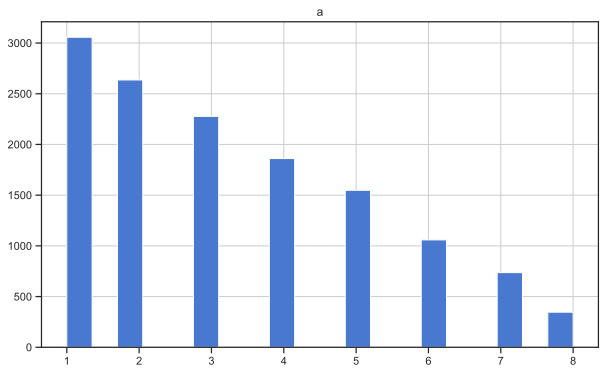

In [30]:
# Гистограмма
#dataStr[['A','count_oracle','R','a','b','c','log2(R)']].hist(figsize=(20,16), bins=20);
dataStr[['a']].hist(figsize=(10,6), bins=20);

In [427]:
# Матрица корреляции

#corr_matrix = data_big_R.drop(['counter','abs.first.first', 'abs.first.second', 'abs.second.first','abs.second.second'], axis=1).corr()
#sns.heatmap(corr_matrix);

#sns.heatmap(dataStr.corr(),cmap='coolwarm',annot=True);

In [425]:
# совместное распределение по двум переменным + гистограмма

#sns.set(style="ticks", palette="muted")

# график рассеивания с маргинальными гистограммами
#hexplot = sns.jointplot(x=dataStr['R'], y=dataStr['count_oracle']);

#Добавлена регрессию и подгонку плотности ядра:
#sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='reg', scatter_kws={"s": 8}, ci=None);

# график рассеивания с наложением
#hexplot = sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='hex');

#плотность
#sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='kde', space = 0);

# график рассеивания + оценка плотности соединения
#sns.jointplot(dataStr['R'], dataStr['count_oracle'], sizes = (10,10)).plot_joint(sns.kdeplot, zorder=10, n_levels=10)

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# # # make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# plt.colorbar(cax=cbar_ax)
# plt.show()

## 2) МНК

In [37]:
data1 = pd.read_csv('C:/Users/Татьяна/source/repos/course_2019/course_2019/quad_big_R_1.txt', header = None, sep = '\t', engine='python', delimiter=';')
data2 = pd.read_csv('C:/Users/Татьяна/source/repos/course_2019/course_2019/quad_big_R.txt', header = None, sep = '\t', engine='python', delimiter=';')
data = pd.concat([data1,data2], ignore_index=True)
#data = pd.read_csv('C:/Users/Татьяна/source/repos/course_2019/course_2019/quad.txt', header = None, sep = '\t', engine='python', delimiter=';')

data.columns = ['counter', 'a', 'b', 'c','first.first', 'first.second', 'second.first', 'second.second', 'first_min', 'second_min', 'count_oracle']

data['abs.first.first'] = data['first.first'].abs()
data['abs.first.second'] = data['first.second'].abs()
data['abs.second.first'] = data['second.first'].abs()
data['abs.second.second'] = data['second.second'].abs()
data['R'] = data[['abs.first.first','abs.first.second','abs.second.first','abs.second.second']].max(axis=1)
data['log2(R)'] = np.log2(data['R'])

data.drop(data.index[[6180, 12432, 21597, 43645, 43914, 46566, 49743, 52428, 63167, 67608, 70178, 71208, 79071, 81102, 86213, 87165, 88887, 92224, 96326]], inplace=True)
print(data.shape) 

(98893, 17)


In [38]:
dataStr = data

In [39]:
# МНК for quad
x = dataStr['log2(R)']
y = dataStr['count_oracle']

M = np.vstack([x, np.ones(len(x))]).T
A, B = np.linalg.lstsq(M, y, rcond=None)[0]
A, B

(2.002676511680452, 5.940480963091357)

In [36]:
dataStr[['count_oracle']].describe()

,count_oracle
count,98893.000000
mean,58.432761
std,3.625532
min,19.000000
25%,57.000000
50%,59.000000
75%,61.000000
max,65.000000


In [478]:
print(data.shape) 

(98893, 17)


### Графики

In [411]:
# Гистограмма
#dataStr[['A','count_oracle','R','a','b','c','log2(R)']].hist(figsize=(20,16), bins=20);
#dataStr[['R']].hist(figsize=(10,6), bins=20);

In [437]:
# Матрица корреляции

#corr_matrix = data_big_R.drop(['counter','abs.first.first', 'abs.first.second', 'abs.second.first','abs.second.second'], axis=1).corr()
#sns.heatmap(corr_matrix);

#sns.heatmap(dataStr.corr(),cmap='coolwarm',annot=True);

In [477]:
# совместное распределение по двум переменным + гистограмма

#sns.set(style="ticks", palette="muted")

# график рассеивания с маргинальными гистограммами
#sns_plot = sns.jointplot(x=dataStr['R'], y=dataStr['count_oracle'], linewidth=1, kind='scatter', ratio=5, alpha = 0.75);

#Добавлена регрессию и подгонку плотности ядра:
#sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='reg', scatter_kws={"s": 8}, ci=None);

# график рассеивания с наложением
#hexplot = sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='hex',data=dataStr);

#плотность
#sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='kde', space = 0);

# график рассеивания + оценка плотности соединения
#sns.jointplot(dataStr['R'], dataStr['count_oracle'], sizes = (10,10)).plot_joint(sns.kdeplot, zorder=10, n_levels=10)

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# plt.colorbar(cax=cbar_ax)
# plt.show()

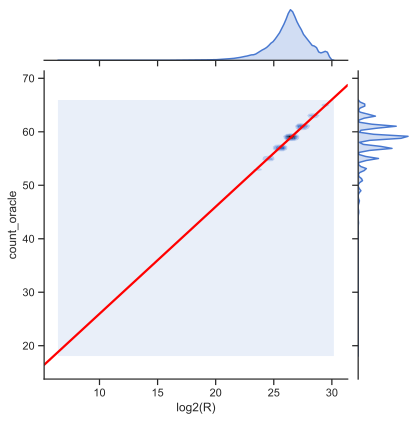

In [41]:
# Рассеивание + прямая

hexplot = sns.jointplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], kind='kde');
sns.regplot(x=dataStr['log2(R)'], y=dataStr['count_oracle'], scatter = False, color = 'red',ax = hexplot.ax_joint);